In [1]:
%matplotlib inline
import sys
sys.path.append('RubiksCube_TwophaseSolver')
import solver as sv

loading conj_twist table...
loading conj_ud_edges table...
loading flipslice sym-tables...
loading move_twist table...
loading move_flip table...
loading move_slice_sorted table...
loading move_u_edges table...
loading move_d_edges table...
loading move_ud_edges table...
loading move_corners table...
loading phase1_prun table...
loading phase2_prun table...
loading phase2_cornsliceprun table...


In [2]:
from RubiksCube_TwophaseSolver import cubie, face
from compatibility import *

In [3]:
#cb = cubie.CubieCube()
#renderCubie(cb)
#pass

ULRFURUBUFDULRLBFFLDLUFFDUDRFLBDDFRDBRBBLBLLBFDRUBRRUD
D1 L2 B2 U1 F2 L2 D2 R2 U2 L1 F3 R3 U1 B3 L3 U2 B3 D1 L3 D1 


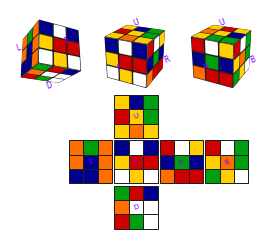

In [5]:
cb3 = cubie.CubieCube()
cb3.randomize()
renderCubie(cb3)
print(cb3.to_facelet_cube().to_string())
sol = solveCubie(cb3,False)
print(sol)

UUUUUUUUURRRRRRRRRFFFFFFFFFDDDDDDDDDLLLLLLLLLBBBBBBBBB



Exception in thread Thread-16:
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/borgor/Documents/CMPS140/cubeAI/Dataset_generation/RubiksCube_TwophaseSolver/solver.py", line 193, in run
    self.search(self.co_cube.flip, self.co_cube.twist, self.co_cube.slice_sorted, dist, togo1)
  File "/Users/borgor/Documents/CMPS140/cubeAI/Dataset_generation/RubiksCube_TwophaseSolver/solver.py", line 114, in search
    m = self.sofar_phase1[-1]
IndexError: list index out of range



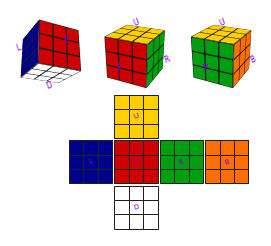

In [6]:
cb3 = cubie.CubieCube()
#cb3.randomize()
renderCubie(cb3)
print(cb3.to_facelet_cube().to_string())
sol = solveCubie(cb3,False)
print(sol)

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

from keras.utils import np_utils

from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [ ]:
dtrain,ltrain = makeData(100000)

Initializing new cube
moved R 0 2
Iterations complete: 0
moved U 2 1
moved R 0 2
moved U 0 3
moved R 2 2
moved F 2 2
moved U 2 3
moved F 2 2
moved F 0 2
moved R 2 2
moved F 0 1
moved R 0 1
moved U 2 1
moved R 2 1
moved R 0 2
moved U 2 3
moved R 2 2
moved F 0 3
moved U 2 2
moved R 2 3
Initializing new cube
moved R 0 2
moved R 2 1
moved U 2 1
moved R 0 3
moved U 0 2
moved F 0 3
moved R 2 1
moved F 0 3
moved R 2 2
moved F 2 1
moved R 2 3
moved U 2 2
moved F 0 2
moved R 0 1
moved F 0 2
moved R 2 3
moved U 2 2
moved R 2 3
moved F 0 2
moved U 2 2
Initializing new cube
moved U 0 1
moved F 2 3
moved U 0 3
moved R 2 3
moved F 0 3
moved U 2 1
moved F 0 1
moved U 2 1
moved F 2 3
moved R 2 1
moved F 2 2
moved R 0 3
moved U 2 3
moved F 0 2
moved U 0 1
moved F 2 2
moved U 2 1
moved F 0 2
moved U 0 1
moved R 0 2
Initializing new cube
moved R 2 2
moved F 2 2
moved R 2 2
moved U 2 2
moved R 2 2
moved U 0 3
moved F 2 2
moved R 0 2
moved F 0 2
moved R 0 1
moved F 2 3
moved R 0 2
moved U 2 3
moved R 2 3
m

moved F 0 2
moved R 0 2
moved U 0 2
moved U 2 1
moved R 2 3
moved F 0 2
moved F 2 1
moved U 2 1
moved R 2 2
moved U 0 3
moved F 0 1
moved R 2 3
moved F 0 2
moved R 0 2
moved F 0 2
moved F 2 2
moved R 0 3
moved U 2 2
moved R 2 1
moved F 0 2
Initializing new cube
moved R 0 3
moved F 0 3
moved R 2 1
moved F 0 2
moved F 2 2
moved U 0 3
moved F 2 1
moved R 0 2
moved F 2 1
moved R 2 1
moved F 0 1
moved U 0 2
moved R 2 2
moved U 0 3
moved F 0 2
moved R 2 2
moved U 2 1
moved R 0 2
moved U 2 3
moved R 0 2
Initializing new cube
moved R 2 2
moved F 2 2
moved U 0 2
moved F 2 3
moved R 0 2
moved U 2 2
moved F 0 2
moved U 0 2
moved F 2 1
moved R 2 1
moved R 0 2
moved U 2 3
moved R 0 3
moved F 2 3
moved U 0 1
moved R 2 3
moved U 0 2
moved F 0 2
moved U 2 2
moved U 0 3
Initializing new cube
moved F 0 2
moved R 2 1
moved U 2 3
moved F 0 1
moved R 2 2
moved U 2 3
moved F 2 1
moved U 2 1
moved R 2 1
moved U 2 1
moved F 0 1
Iterations complete: 700
moved U 0 2
moved R 2 2
moved F 2 3
moved R 0 2
moved F 2

moved F 2 1
moved U 2 3
moved F 2 2
moved R 0 1
moved F 2 2
moved F 0 3
moved U 0 3
moved R 2 2
moved R 0 2
Initializing new cube
moved U 0 2
moved R 2 1
moved F 2 3
moved R 0 1
moved F 2 1
moved U 0 1
moved F 2 3
moved R 2 2
moved U 0 3
moved F 0 1
moved R 0 3
moved U 0 2
moved R 0 2
moved F 0 2
moved R 2 3
moved U 2 2
moved F 2 2
moved U 0 2
moved R 2 2
moved F 2 2
Initializing new cube
moved U 2 3
moved R 2 2
moved U 2 1
moved F 2 3
moved U 0 3
moved U 2 3
moved R 0 1
moved F 2 2
moved U 0 1
moved F 2 3
moved U 0 3
moved F 0 2
moved U 0 3
moved R 2 2
moved U 0 3
moved U 2 3
Iterations complete: 1300
moved R 2 2
moved U 2 1
moved R 0 2
moved F 2 2
Initializing new cube
moved U 0 3
moved R 2 1
moved U 2 1
moved F 2 1
moved R 0 2
moved R 2 2
moved U 0 2
moved R 2 1
moved U 0 2
moved F 0 1
moved U 0 1
moved U 2 2
moved F 0 2
moved F 2 2
moved R 0 2
moved U 2 2
moved R 2 2
moved U 0 1
moved F 0 2
moved R 0 2
Initializing new cube
moved R 0 2
moved F 2 1
moved R 2 2
moved F 2 2
moved R 0 

moved R 0 3
moved U 0 3
moved R 2 3
moved F 2 1
moved U 2 2
moved F 0 1
moved U 0 3
moved F 2 2
moved R 2 3
moved U 2 1
moved R 0 1
moved U 2 1
moved R 2 2
moved U 2 3
moved R 0 2
moved F 0 2
moved U 0 2
moved R 0 2
moved F 0 2
moved F 2 2
Initializing new cube
moved R 0 3
moved F 2 2
Iterations complete: 1900
moved R 2 2
moved U 2 1
moved R 0 1
moved F 0 2
moved U 0 3
moved U 2 1
moved F 2 1
moved U 2 1
moved F 0 1
moved R 2 2
moved U 0 3
moved F 2 2
moved R 2 2
moved U 2 1
moved R 0 2
moved F 2 2
moved U 0 1
Initializing new cube
moved U 0 1
moved F 0 3
moved R 2 3
moved U 0 3
moved F 0 1
moved R 2 3
moved U 2 2
moved F 0 2
moved R 0 2
moved U 2 1
moved F 2 1
moved U 0 2
moved U 2 1
moved F 2 2
moved R 0 2
moved U 2 3
moved R 2 2
moved U 0 3
moved R 0 2
moved U 2 2
Initializing new cube
moved R 0 2
moved U 0 2
moved F 0 1
moved F 2 3
moved U 0 3
moved R 2 1
moved U 0 2
moved R 2 3
moved F 0 3
moved R 2 1
moved U 0 3
moved F 0 2
moved F 2 2
moved R 0 2
moved U 2 1
moved F 2 2
moved R 

moved R 2 2
moved F 0 2
moved R 0 2
moved U 2 1
moved F 0 2
moved F 2 2
Initializing new cube
moved R 0 2
moved U 0 3
moved F 0 2
moved U 2 2
moved F 0 1
moved U 0 1
moved F 0 1
moved R 0 3
moved F 2 3
moved U 0 1
moved U 2 1
moved R 0 3
moved U 2 2
moved R 2 2
moved U 2 2
moved F 0 2
moved R 0 1
moved U 2 2
moved R 2 3
moved U 2 2
Initializing new cube
moved F 2 2
moved U 0 1
moved F 0 2
moved U 0 3
moved F 0 2
moved R 2 3
moved U 0 1
moved R 0 3
moved U 0 1
moved R 0 2
moved U 0 2
moved R 0 2
moved U 0 2
moved R 0 2
moved F 0 3
moved U 0 2
moved F 2 2
moved U 2 2
moved F 2 1
Initializing new cube
moved U 2 2
moved F 2 3
moved U 0 2
moved F 2 2
moved F 0 1
moved R 0 2
moved U 2 2
moved U 0 2
moved F 2 2
Iterations complete: 2600
moved U 0 3
moved F 0 1
moved R 2 2
moved F 0 2
moved U 0 3
moved R 0 1
moved F 2 2
moved U 0 1
moved R 2 2
moved F 0 3
moved U 2 1
Initializing new cube
moved R 0 2
moved R 2 2
moved U 2 2
moved F 0 2
moved U 0 1
moved R 2 3
moved F 2 2
moved R 0 2
moved R 2 

moved U 2 2
moved R 0 3
moved F 0 3
moved F 2 1
moved U 0 1
moved U 2 2
moved F 0 3
moved R 2 2
moved U 2 1
moved R 2 3
moved U 0 2
moved U 2 2
moved R 0 2
moved F 0 1
moved U 0 2
moved F 2 3
moved R 0 2
moved F 0 1
moved R 0 2
Initializing new cube
moved F 2 2
moved F 0 2
moved U 2 2
moved R 2 1
moved U 2 2
moved R 2 1
moved U 0 2
moved F 0 2
moved R 2 2
moved F 0 1
moved U 2 3
moved U 0 1
moved R 0 1
moved U 2 3
moved U 0 1
moved R 2 3
moved R 0 2
moved U 0 3
moved R 2 2
Initializing new cube
moved U 2 2
moved F 2 1
moved F 0 3
moved U 2 2
moved F 2 3
moved U 2 2
moved U 0 2
moved F 2 3
moved F 0 2
moved U 0 2
moved R 2 1
moved U 0 1
moved F 0 1
moved U 0 2
moved F 0 2
moved R 0 3
moved U 0 3
moved R 2 2
moved F 0 1
moved U 2 3
Initializing new cube
moved F 2 2
moved U 0 2
moved R 2 2
moved F 2 2
moved R 0 2
moved F 0 3
moved U 0 2
moved F 0 2
moved R 2 3
moved R 0 1
moved F 2 3
moved U 0 3
moved R 2 1
moved U 2 1
moved U 0 1
moved R 2 1
moved R 0 2
moved U 2 3
moved F 2 2
Initializi

moved F 0 3
moved U 0 1
moved R 0 3
moved F 2 3
moved U 2 1
moved F 0 1
moved R 0 3
moved F 2 3
moved R 0 3
moved F 2 3
moved U 2 1
moved R 0 2
moved U 0 2
moved F 2 2
moved R 0 2
moved U 0 2
moved R 2 2
moved U 2 2
moved R 2 2
moved F 2 1
Initializing new cube
moved R 0 1
moved F 2 3
moved R 0 1
moved U 0 1
moved F 0 3
moved R 0 3
moved U 0 1
moved F 0 1
moved U 2 3
moved R 0 3
moved F 0 1
moved R 0 3
moved F 0 2
moved R 2 2
moved F 2 2
moved R 0 1
moved F 0 2
moved R 0 1
moved F 0 2
moved R 2 1
moved F 2 2
Initializing new cube
moved F 0 2
moved R 2 2
moved F 2 1
moved U 2 2
moved F 0 1
moved R 2 2
moved F 0 1
moved R 2 2
moved U 2 2
moved U 0 3
moved R 0 1
moved F 0 3
moved U 0 3
moved F 0 2
moved R 2 3
moved F 2 3
moved U 2 3
moved R 2 1
moved U 0 2
Initializing new cube
moved U 0 2
moved R 2 1
moved R 0 3
Iterations complete: 3900
moved F 2 2
moved R 2 3
moved U 2 2
moved R 2 3
moved F 2 2
moved R 0 1
moved U 2 2
moved U 0 3
moved F 0 1
moved U 2 2
moved F 2 3
moved R 0 1
moved U 

moved F 2 2
moved U 2 2
moved F 0 3
moved U 2 2
moved R 2 2
moved F 2 2
moved U 0 2
moved F 2 3
moved U 2 2
moved R 2 3
moved F 2 1
moved U 2 1
moved U 0 3
moved R 2 2
moved F 0 3
moved U 2 1
moved F 2 3
moved U 0 2
moved F 0 1
moved R 0 3
Initializing new cube
moved U 0 2
moved F 2 2
moved R 2 2
moved U 0 2
moved R 2 2
moved F 0 1
moved U 2 2
moved U 0 2
moved R 2 2
moved U 2 2
moved U 0 1
moved F 2 1
moved U 0 3
moved R 0 3
moved F 2 2
moved U 2 3
moved F 2 2
moved F 0 3
moved U 0 3
moved R 0 2
Initializing new cube
moved R 2 3
moved U 0 1
moved R 0 1
moved U 0 2
moved R 0 3
Iterations complete: 4500
moved R 2 2
moved F 2 1
moved U 0 2
moved R 0 2
moved U 0 1
moved F 0 1
moved R 0 2
moved U 2 2
moved R 0 2
moved U 0 2
moved F 0 3
moved U 0 2
moved F 2 3
moved U 0 2
moved F 2 1
Initializing new cube
moved F 0 1
moved U 0 2
moved F 0 1
moved R 0 2
moved F 2 3
moved R 2 2
moved F 0 2
moved U 2 2
moved F 0 1
moved U 2 2
moved R 0 3
moved F 0 3
moved R 2 2
moved F 2 2
moved R 0 3
moved U 

moved F 2 3
moved R 2 2
moved U 2 2
moved F 0 1
moved U 0 2
moved R 2 2
moved U 2 2
moved R 2 2
moved F 0 3
moved U 2 3
moved R 0 1
moved F 0 2
moved R 0 3
moved F 2 3
moved F 0 3
moved R 2 3
moved F 0 2
moved R 0 1
moved U 0 1
moved R 0 2
Initializing new cube
moved U 0 3
moved U 2 2
moved F 0 1
moved F 2 3
moved R 2 3
moved F 0 1
moved U 2 3
moved F 2 3
moved R 0 3
moved F 2 3
moved R 2 1
moved U 2 3
Iterations complete: 5100
moved R 0 2
moved U 2 1
moved F 2 2
moved U 2 2
moved R 0 2
moved U 2 1
moved R 2 2
moved F 2 2
Initializing new cube
moved R 2 2
moved F 2 3
moved U 0 1
moved F 2 2
moved U 2 3
moved R 0 3
moved F 0 1
moved R 2 3
moved F 0 3
moved R 2 1
moved F 0 1
moved U 0 2
moved R 0 2
moved U 0 2
moved R 2 2
moved F 2 2
moved R 0 2
moved F 0 1
moved R 0 2
moved F 0 3
Initializing new cube
moved R 0 3
moved U 2 2
moved R 2 1
moved U 0 2
moved R 0 2
moved F 0 3
moved U 2 1
moved F 2 3
moved R 2 1
moved U 2 3
moved F 2 3
moved R 2 2
moved U 2 3
moved F 0 2
moved U 2 1
moved F 

moved R 2 2
moved F 2 2
moved R 0 2
Initializing new cube
moved U 2 2
moved F 0 2
moved R 2 3
moved F 2 1
moved R 0 3
moved U 2 3
moved R 2 2
moved F 2 3
moved U 0 2
moved R 2 3
moved U 2 3
moved F 2 2
moved R 0 2
moved U 0 1
moved R 2 2
moved F 0 2
moved U 0 2
moved R 2 2
moved U 0 1
moved F 0 2
Initializing new cube
moved U 0 3
moved F 2 3
moved R 0 2
moved R 2 2
moved U 0 1
moved F 0 1
moved U 2 1
moved F 2 2
moved R 2 1
moved U 2 2
moved F 0 1
moved U 0 2
moved F 0 1
moved U 2 2
moved F 0 3
moved R 2 2
moved U 0 2
moved F 2 2
Iterations complete: 5800
moved U 2 2
Initializing new cube
moved U 2 2
moved F 0 1
moved U 2 2
moved U 0 2
moved R 0 2
moved F 2 2
moved U 0 2
moved F 0 1
moved R 2 2
moved F 0 2
moved R 2 1
moved F 2 2
moved R 2 1
moved F 2 1
moved U 0 1
moved R 2 1
moved F 0 1
moved R 2 2
moved F 2 3
moved U 0 3
Initializing new cube
moved F 0 2
moved R 2 3
moved F 0 2
moved R 0 1
moved F 2 3
moved U 0 3
moved R 0 2
moved F 2 1
moved R 0 2
moved U 0 3
moved F 0 2
moved F 2 

moved F 0 2
moved U 2 3
moved F 0 1
moved R 0 1
moved U 2 1
moved F 2 2
moved R 2 1
moved U 0 2
moved R 0 3
moved F 2 2
moved R 2 1
moved U 0 2
moved R 0 1
moved R 2 3
Initializing new cube
moved R 0 1
moved F 0 2
moved U 0 2
moved F 2 1
moved R 0 1
moved F 2 1
moved R 2 1
moved U 2 3
moved F 0 2
moved U 0 3
moved F 2 1
moved R 0 1
Iterations complete: 6400
moved F 0 2
moved U 0 2
moved U 2 2
moved R 0 1
moved U 0 2
moved R 0 3
moved U 0 2
moved R 2 1
Initializing new cube
moved F 0 1
moved R 2 2
moved R 0 2
moved F 2 3
moved R 0 2
moved U 2 2
moved R 2 2
moved U 0 2
moved F 2 1
moved R 0 2
moved U 0 1
moved F 0 1
moved R 0 3
moved U 2 2
moved F 2 2
moved U 0 1
moved F 2 3
moved R 0 2
moved U 0 1
moved R 0 1
Initializing new cube
moved F 0 3
moved U 2 2
moved F 0 1
moved R 0 3
moved F 0 2
moved U 2 3
moved F 2 3
moved U 0 2
moved R 0 3
moved F 0 3
moved U 2 1
moved R 2 2
moved F 0 2
moved R 0 2
moved F 2 3
moved U 0 2
moved F 0 2
moved R 2 2
moved U 0 2
moved F 2 1
Initializing new cub

moved R 2 3
moved U 0 3
moved F 0 1
moved R 0 2
moved F 0 2
moved R 2 2
moved F 2 2
moved U 0 3
moved F 2 2
moved R 2 2
moved U 0 3
Iterations complete: 7000
moved U 2 1
moved R 0 2
Initializing new cube
moved U 2 2
moved F 0 1
moved F 2 1
moved U 0 2
moved R 2 3
moved U 0 3
moved R 0 3
moved U 2 3
moved F 2 1
moved R 2 1
moved F 2 2
moved U 0 1
moved U 2 2
moved R 2 2
moved U 2 2
moved R 0 2
moved U 2 1
moved F 0 2
moved U 2 2
moved F 2 2
Initializing new cube
moved U 2 2
moved F 0 3
moved R 2 3
moved U 2 2
moved R 0 3
moved F 0 1
moved U 0 2
moved F 0 1
moved U 2 1
moved F 0 1
moved U 2 2
moved R 0 1
moved F 2 2
moved U 2 2
moved F 0 2
moved R 0 2
moved F 0 2
moved R 2 1
moved U 0 2
moved F 0 2
Initializing new cube
moved U 2 3
moved F 2 2
moved U 2 3
moved R 2 2
moved U 2 2
moved F 2 2
moved R 0 2
moved F 0 2
moved U 0 3
moved F 2 2
moved R 2 1
moved F 2 1
moved U 2 2
moved F 0 1
moved U 2 1
moved R 0 1
moved F 2 2
moved R 0 3
moved F 2 1
moved R 2 2
Initializing new cube
moved R 0 

moved F 0 2
moved U 2 3
moved R 2 2
moved U 2 1
moved R 2 2
moved U 0 3
moved R 0 2
moved F 0 2
Iterations complete: 7700
moved R 2 3
moved F 2 1
moved R 0 1
moved F 0 3
moved R 2 1
moved F 2 3
moved R 0 2
moved U 2 3
moved F 2 3
moved R 0 2
moved F 0 3
moved U 0 3
Initializing new cube
moved F 0 1
moved U 0 1
moved R 2 3
moved U 2 1
moved F 2 3
moved R 2 1
moved F 0 3
moved R 2 3
moved F 0 3
moved F 2 3
moved U 0 2
moved F 2 2
moved R 2 3
moved U 0 2
moved R 2 2
moved F 2 2
moved U 2 2
moved R 2 3
moved U 0 2
moved F 0 2
Initializing new cube
moved F 0 2
moved R 0 2
moved U 0 1
moved F 0 1
moved R 2 3
moved F 2 3
moved U 0 1
moved R 2 1
moved U 0 2
moved R 2 2
moved U 2 3
moved F 0 2
moved U 0 2
moved F 0 1
moved R 0 2
moved U 0 2
moved F 2 2
moved R 0 2
moved F 2 2
moved R 0 2
Initializing new cube
moved R 0 2
moved F 2 1
moved U 2 3
moved F 2 1
moved U 0 3
moved R 0 3
moved R 2 2
moved U 0 3
moved U 2 1
moved R 2 1
moved U 2 3
moved R 0 2
moved U 2 3
moved R 0 2
moved F 2 2
moved R 

moved U 2 2
moved F 0 2
moved R 0 2
moved U 0 2
moved U 2 2
moved R 0 3
moved F 0 2
Initializing new cube
moved R 0 2
moved U 0 2
moved F 2 2
moved F 0 2
moved U 0 1
moved F 0 2
moved R 0 2
moved F 2 2
moved R 2 2
moved R 0 3
moved F 0 2
moved U 0 3
moved R 0 2
moved F 2 3
moved F 0 3
moved U 2 3
moved F 2 2
moved U 0 3
moved R 2 3
moved U 2 2
Initializing new cube
moved F 0 3
moved U 0 1
moved R 0 3
moved U 2 3
moved F 0 3
moved U 0 1
moved F 0 3
moved R 2 1
moved F 2 3
moved R 2 2
moved F 2 3
moved R 0 1
moved F 0 2
moved R 0 2
moved F 2 3
moved U 0 2
moved F 0 3
moved U 2 2
moved R 2 2
moved U 0 2
Initializing new cube
moved U 2 1
moved R 0 2
moved F 0 2
moved U 0 3
moved R 0 2
moved U 0 2
moved F 0 2
moved R 2 2
moved F 2 2
moved R 2 2
moved F 0 1
moved U 0 3
Iterations complete: 8400
moved R 0 3
moved U 0 1
moved R 0 2
moved F 2 2
moved U 0 3
moved R 2 1
moved F 2 1
moved R 2 2
Initializing new cube
moved F 2 1
moved R 2 3
moved F 0 1
moved R 0 1
moved R 2 3
moved F 0 2
moved R 2 

moved U 2 1
moved R 0 2
moved U 0 3
Initializing new cube
moved F 2 1
moved U 0 2
moved U 2 3
moved R 0 3
moved U 0 3
moved F 0 1
moved U 2 3
moved R 2 1
moved F 2 2
moved R 2 3
moved F 0 3
moved R 2 2
moved F 2 3
moved R 2 2
moved F 2 3
moved U 0 2
moved F 2 1
moved U 2 2
moved F 0 2
moved R 0 2
Initializing new cube
moved U 0 2
moved R 2 3
moved F 0 1
moved F 2 3
moved U 0 2
moved R 0 3
moved F 2 2
moved U 0 1
moved F 0 3
moved F 2 3
moved R 2 3
moved U 2 2
moved R 2 2
moved F 2 3
moved U 0 2
moved F 2 1
moved U 0 2
moved F 0 3
moved U 0 2
moved R 0 2
Initializing new cube
moved U 0 2
Iterations complete: 9000
moved R 2 2
moved F 0 1
moved U 2 2
moved F 0 2
moved R 2 2
moved F 2 3
moved R 2 2
moved F 0 1
moved U 2 1
moved R 2 1
moved F 2 1
moved R 0 2
moved F 0 3
moved R 0 2
moved U 0 3
moved F 0 2
moved U 0 2
moved F 0 2
moved R 2 1
Initializing new cube
moved U 0 2
moved R 0 2
moved U 2 3
moved R 2 2
moved F 0 2
moved U 0 1
moved F 0 2
moved U 0 2
moved F 0 2
moved R 0 3
moved U 2 

moved R 0 2
moved F 2 2
moved R 0 2
moved F 2 2
moved R 0 2
Initializing new cube
moved R 2 2
moved F 0 3
moved F 2 3
moved U 2 1
moved R 0 2
moved F 0 1
moved F 2 1
moved R 0 1
moved U 0 2
moved F 0 3
moved U 0 3
moved R 2 2
moved F 2 1
moved R 0 2
moved F 0 1
moved R 2 2
moved F 0 2
moved R 0 2
moved U 2 2
moved R 2 2
Initializing new cube
moved R 0 2
moved R 2 3
moved U 0 1
moved F 2 1
moved U 2 2
Iterations complete: 9600
moved R 0 1
moved F 2 2
moved R 2 1
moved F 2 2
moved R 2 3
moved F 0 3
moved F 2 2
moved R 0 3
moved U 2 2
moved R 0 2
moved F 0 2
moved U 0 2
moved R 2 2
moved F 2 2
moved U 2 2
Initializing new cube
moved U 0 1
moved R 0 3
moved F 0 2
moved F 2 2
moved U 0 2
moved F 0 2
moved U 0 1
moved R 0 1
moved F 0 3
moved F 2 2
moved R 0 1
moved F 2 3
moved U 0 2
moved U 2 2
moved F 0 3
moved R 2 2
moved F 0 3
moved R 2 2
moved F 0 3
moved R 2 2
Initializing new cube
moved U 0 1
moved F 0 1
moved R 0 3
moved F 2 3
moved U 0 1
moved F 2 1
moved R 2 2
moved U 0 1
moved R 2 

moved R 0 1
moved U 0 2
moved R 0 3
moved F 2 2
moved U 0 2
moved R 0 3
moved U 0 2
moved F 2 2
moved U 0 2
moved R 0 2
moved U 2 3
moved U 0 3
moved F 0 3
moved R 2 3
moved F 2 3
moved U 0 3
moved R 0 3
moved F 0 3
moved R 0 2
moved F 2 1
Initializing new cube
moved F 2 3
moved U 0 1
moved F 0 1
moved R 2 2
moved F 2 2
moved U 2 1
moved F 0 1
moved U 0 1
moved R 2 3
moved U 0 1
moved F 0 2
moved U 0 2
Iterations complete: 10300
moved F 0 2
moved F 2 2
moved R 0 2
moved U 2 2
moved F 0 2
moved R 0 3
moved U 0 2
moved R 2 1
Initializing new cube
moved R 2 3
moved F 0 1
moved U 2 1
moved F 0 3
moved R 0 3
moved F 2 3
moved U 0 2
moved R 0 1
moved U 0 3
moved R 2 1
moved U 2 1
moved R 0 2
moved U 0 1
moved U 2 2
moved F 2 2
moved U 0 3
moved R 2 2
moved F 2 2
moved U 2 3
moved F 2 2
Initializing new cube
moved F 2 1
moved U 0 3
moved U 2 2
moved F 0 2
moved U 2 2
moved F 2 3
moved R 0 1
moved U 2 1
moved F 2 3
moved R 2 1
moved F 2 2
moved U 0 2
moved R 0 2
moved U 2 3
moved R 0 2
moved F

moved R 2 2
Initializing new cube
moved R 2 2
moved U 2 1
moved F 0 1
moved F 2 1
moved R 2 1
moved F 0 3
moved U 0 3
moved F 0 1
moved F 2 1
moved U 2 1
moved R 0 1
moved F 0 1
moved U 0 2
moved F 0 1
moved R 0 2
moved F 0 2
moved U 2 2
moved F 2 1
moved R 0 2
moved F 0 2
Initializing new cube
moved R 2 3
moved U 2 3
moved R 2 1
moved F 2 1
moved U 0 3
moved R 0 1
moved U 0 2
moved F 0 1
moved F 2 3
moved R 0 1
moved U 0 1
moved R 0 3
moved F 2 2
moved U 0 2
moved R 2 3
moved U 0 2
moved R 0 1
moved U 0 2
moved R 2 3
moved F 0 2
Initializing new cube
moved U 0 3
moved F 0 3
moved R 2 1
moved U 2 3
moved R 0 2
moved U 2 3
moved R 2 1
moved F 2 1
moved R 2 2
moved U 0 1
moved R 0 2
moved U 0 2
moved R 2 2
moved F 0 3
moved F 2 1
moved R 0 2
moved U 2 2
moved F 0 3
moved U 2 2
moved F 2 3
Initializing new cube
moved R 2 1
moved F 2 2
moved U 0 3
moved F 2 2
moved R 0 3
moved F 0 3
moved U 0 3
moved U 2 2
moved F 2 1
moved U 0 1
moved R 2 2
moved F 0 3
moved R 2 2
moved U 0 2
moved R 0 2


moved F 0 2
moved U 2 3
moved R 2 2
moved U 0 2
Initializing new cube
moved R 0 1
moved R 2 1
moved F 0 2
moved R 0 3
moved U 0 1
moved R 0 2
moved U 0 2
moved F 2 1
moved U 2 1
moved F 0 1
moved U 2 3
moved F 2 2
moved U 0 3
moved R 0 2
moved U 2 3
moved R 2 2
moved U 2 1
moved R 2 2
moved U 2 3
Initializing new cube
moved F 2 2
moved R 2 2
moved F 0 2
moved U 2 3
moved F 2 2
moved U 0 3
moved R 0 2
moved U 2 1
moved U 0 1
moved R 0 2
moved F 0 3
moved R 0 2
moved F 2 2
moved F 0 1
moved U 0 1
moved R 0 3
moved U 2 2
moved F 0 3
moved U 0 1
moved F 2 1
Initializing new cube
moved R 2 1
moved F 0 2
moved U 0 1
moved U 2 2
moved F 0 2
moved F 2 3
moved R 2 2
moved F 0 3
moved U 0 1
moved R 0 1
moved F 0 3
moved R 2 2
moved F 0 2
moved U 0 3
moved F 2 2
moved R 2 2
moved F 2 2
moved U 2 3
moved F 2 2
Iterations complete: 11600
moved U 0 2
Initializing new cube
moved F 2 2
moved R 2 1
moved F 0 1
moved R 2 3
moved U 0 3
moved R 0 3
moved R 2 3
moved F 0 3
moved F 2 1
moved U 0 3
moved R 2

moved U 0 1
moved R 2 3
moved F 2 1
moved U 0 3
moved F 0 3
moved U 2 3
moved R 2 2
moved F 0 1
moved R 0 2
moved F 2 3
moved R 0 2
moved F 0 2
moved R 2 2
moved F 0 2
moved U 2 3
moved F 2 2
moved U 0 1
moved U 2 2
moved F 0 2
moved R 2 2
Initializing new cube
moved R 0 2
moved U 2 1
moved F 2 2
moved U 2 3
moved F 2 2
moved R 2 2
moved U 2 2
moved F 0 2
moved U 2 2
moved F 0 2
moved R 2 3
moved F 2 3
moved U 0 1
moved R 0 3
moved F 0 1
moved U 0 1
moved R 0 1
moved U 2 2
moved R 0 2
moved U 0 2
Initializing new cube
moved R 2 1
moved F 0 3
moved R 2 1
moved F 2 1
moved R 2 1
moved U 0 1
moved U 2 1
moved R 0 1
Iterations complete: 12200
moved F 0 2
moved R 0 3
moved F 2 2
moved U 2 2
moved F 2 2
moved U 0 1
moved R 0 2
moved F 0 2
moved F 2 2
moved R 2 2
moved F 0 2
moved U 0 1
Initializing new cube
moved F 0 2
moved U 0 2
moved R 0 2
moved F 0 2
moved U 2 2
moved F 0 1
moved R 2 2
moved U 2 2
moved F 2 3
moved R 2 1
moved F 2 3
moved R 0 2
moved U 0 1
moved R 0 3
moved F 0 3
moved R

moved U 0 3
moved R 2 2
moved U 0 2
moved R 0 1
moved F 2 1
moved U 0 3
moved U 2 2
moved F 2 2
moved R 2 3
moved U 0 3
moved F 0 2
moved R 2 2
moved U 2 3
moved F 2 2
moved U 0 3
moved F 0 2
moved U 0 2
moved F 0 2
moved U 2 3
Initializing new cube
moved R 2 2
moved U 2 1
moved F 0 1
moved R 2 1
moved U 2 3
moved F 2 3
moved R 2 1
moved U 0 3
moved R 2 3
moved F 2 1
moved R 0 2
moved F 2 2
moved R 0 2
Iterations complete: 12800
moved R 2 2
moved F 2 1
moved R 2 2
moved F 0 1
moved U 2 2
moved F 0 1
Initializing new cube
moved R 0 2
moved F 0 2
moved U 2 1
moved F 2 2
moved R 2 2
moved U 2 3
moved U 0 2
moved R 0 2
moved F 0 2
moved R 2 2
moved F 0 3
moved R 2 3
moved U 0 2
moved R 2 1
moved F 2 2
moved U 2 1
moved R 0 1
moved U 2 2
moved R 0 1
moved U 0 1
Initializing new cube
moved U 0 2
moved R 0 2
moved U 0 2
moved F 2 1
moved F 0 2
moved U 0 2
moved F 0 3
moved U 2 2
moved R 2 3
moved U 2 3
moved R 0 3
moved U 0 2
moved F 2 1
moved F 0 3
moved R 2 2
moved U 2 2
moved F 0 2
moved U

moved R 0 3
moved U 2 3
moved U 0 1
moved F 2 3
moved R 2 1
moved F 2 3
moved U 0 2
moved R 2 3
moved R 0 2
moved F 0 1
moved U 2 2
Initializing new cube
moved U 0 1
moved R 0 2
moved U 2 2
moved R 0 2
moved F 0 2
moved U 0 1
Iterations complete: 13400
moved F 0 2
moved R 2 2
moved U 0 1
moved F 0 3
moved R 2 3
moved F 0 1
moved U 2 3
moved U 0 1
moved F 0 1
moved R 2 3
moved U 2 3
moved U 0 1
moved F 2 1
moved U 0 1
Initializing new cube
moved R 0 1
moved F 0 3
moved R 0 2
moved U 2 1
moved F 0 1
moved U 2 1
moved R 0 2
moved U 0 1
moved F 2 1
moved R 2 3
moved F 0 3
moved U 0 1
moved F 0 2
moved R 2 3
moved F 0 2
moved R 0 3
moved U 0 2
moved R 0 3
moved R 2 2
moved U 0 2
Initializing new cube
moved R 2 1
moved U 0 3
moved U 2 2
moved F 0 2
moved R 2 2
moved F 0 1
moved R 2 3
moved U 0 2
moved F 0 3
moved U 2 1
moved R 2 3
moved F 0 1
moved U 2 2
moved F 2 3
moved U 0 2
moved F 2 2
moved R 2 2
moved F 2 1
moved R 0 2
moved R 2 2
Initializing new cube
moved U 0 3
moved R 2 2
moved F 0

moved F 2 2
moved U 2 3
moved F 2 2
moved R 2 2
moved U 2 3
moved U 0 3
moved R 2 2
moved R 0 2
moved U 2 1
moved R 2 1
moved F 2 1
moved R 0 3
moved F 0 3
moved U 0 3
moved R 2 2
moved F 2 3
moved U 2 3
moved R 0 1
moved F 2 1
moved R 0 2
Initializing new cube
moved R 2 2
moved F 0 3
moved R 0 2
moved U 2 3
moved R 0 3
moved R 2 3
moved F 0 3
moved U 0 3
moved F 2 3
moved R 0 2
moved F 2 1
moved U 2 3
moved R 0 2
moved F 2 2
moved R 2 2
Iterations complete: 14100
moved U 0 2
moved R 0 2
moved R 2 2
moved F 2 2
moved U 0 3
Initializing new cube
moved U 0 2
moved R 0 2
moved R 2 1
moved F 2 3
moved U 0 3
moved R 0 3
moved F 0 3
moved R 0 1
moved U 0 1
moved U 2 2
moved F 0 1
moved U 2 3
moved F 2 2
moved R 2 2
moved F 2 2
moved U 0 1
moved R 0 2
moved U 0 2
moved R 0 2
moved F 2 2
Initializing new cube
moved R 0 2
moved U 0 1
moved R 0 1
moved F 2 2
moved U 2 3
moved R 2 2
moved F 2 2
moved U 0 3
moved F 0 3
moved R 0 1
moved R 2 1
moved F 2 3
moved U 0 2
moved R 2 2
moved U 0 3
moved R

moved F 2 2
moved R 0 2
moved U 0 3
moved U 2 3
moved R 0 2
moved U 0 1
Initializing new cube
moved R 0 2
moved U 0 1
moved R 0 2
moved U 2 1
moved R 2 2
moved F 2 2
moved U 2 3
moved R 0 2
moved F 2 2
moved R 0 3
moved F 0 1
moved R 2 1
moved F 2 2
moved U 2 2
moved U 0 2
moved R 2 3
moved U 2 3
moved U 0 1
moved R 0 1
moved U 0 3
Initializing new cube
moved R 2 1
moved U 2 2
moved F 2 2
moved U 2 3
moved F 0 1
moved F 2 1
moved U 0 1
moved U 2 1
moved F 2 3
moved U 2 1
moved R 0 3
moved F 2 2
moved U 2 1
moved R 0 2
moved U 0 1
moved R 2 2
moved U 2 3
moved F 0 2
moved R 2 2
moved U 2 3
Initializing new cube
moved U 2 3
moved R 0 2
moved R 2 2
moved F 2 2
moved U 0 2
moved U 2 3
moved F 0 1
moved R 0 3
moved F 2 3
moved U 2 2
moved R 2 3
moved U 2 3
moved R 2 2
moved U 0 2
moved F 0 2
moved F 2 2
moved U 2 3
moved F 2 2
moved U 0 2
Iterations complete: 14800
moved R 0 2
Initializing new cube
moved F 0 3
moved U 0 1
moved U 2 2
moved F 0 1
moved R 0 3
moved F 2 1
moved R 2 3
moved F 2

moved F 0 1
moved R 2 3
moved U 2 2
moved R 2 2
moved U 2 3
moved U 0 2
moved F 2 3
Initializing new cube
moved U 0 3
moved F 0 1
moved U 0 2
moved F 2 1
moved U 0 3
moved R 0 3
moved R 2 1
moved U 2 2
moved F 2 1
moved R 0 1
moved F 0 2
moved F 2 2
moved U 0 1
moved F 2 2
moved U 2 1
moved F 0 2
moved R 2 2
moved U 0 1
moved F 2 2
moved R 2 2
Initializing new cube
moved F 0 2
moved R 2 1
moved R 0 3
moved U 2 2
moved F 2 2
moved U 2 2
moved F 2 2
moved R 0 1
moved F 2 1
moved U 2 1
moved R 0 2
moved F 2 2
moved R 2 2
moved U 2 1
moved R 2 3
moved U 2 2
moved F 0 1
moved R 0 1
moved U 0 2
Initializing new cube
moved U 2 1
moved R 2 3
moved F 2 1
moved U 0 1
Iterations complete: 15400
moved R 0 2
moved F 2 2
moved R 0 2
moved R 2 3
moved U 0 3
moved F 0 1
moved F 2 2
moved U 0 3
moved R 2 2
moved U 0 1
moved F 2 2
moved R 0 2
moved U 0 2
moved R 2 2
moved U 0 2
moved F 2 2
Initializing new cube
moved R 0 1
moved F 0 3
moved F 2 3
moved R 2 1
moved F 0 1
moved U 2 3
moved F 2 1
moved U 2

moved F 0 1
moved R 0 2
Initializing new cube
moved R 0 1
moved F 0 1
moved U 0 1
moved F 0 2
moved R 0 3
moved R 2 2
moved U 2 2
moved F 2 1
moved R 2 3
moved F 0 3
moved U 2 2
moved R 2 3
moved F 0 2
moved U 2 2
moved R 0 3
moved U 2 2
moved F 2 2
moved U 0 2
moved F 2 2
Initializing new cube
moved U 0 1
moved F 0 2
moved R 2 1
moved U 0 1
moved R 0 1
moved U 2 3
moved F 2 1
moved U 0 1
moved F 0 2
moved U 2 3
moved F 2 1
moved R 0 2
moved F 0 2
Iterations complete: 16000
moved F 2 2
moved R 0 3
moved U 0 2
moved F 0 2
moved R 2 2
moved F 0 2
moved U 2 2
Initializing new cube
moved U 2 3
moved R 0 3
moved F 2 1
moved R 0 3
moved F 0 1
moved U 2 2
moved R 2 2
moved U 0 3
moved F 2 1
moved R 2 3
moved F 2 3
moved U 0 2
moved R 0 2
moved F 0 2
moved R 0 1
moved U 2 2
moved R 2 2
moved U 2 2
moved R 0 1
moved F 2 2
Initializing new cube
moved F 2 1
moved U 0 1
moved F 0 2
moved R 2 3
moved F 2 2
moved U 0 3
moved U 2 3
moved R 2 2
moved F 2 3
moved R 0 1
moved R 2 2
moved F 2 3
moved U 2

moved U 2 2
moved R 0 2
moved F 0 1
Initializing new cube
moved R 0 2
moved F 0 3
moved R 2 2
moved F 2 2
moved F 0 3
moved U 2 2
moved F 2 1
moved U 2 2
moved U 0 2
moved R 2 2
moved R 0 3
moved U 0 3
moved R 2 2
moved F 2 1
moved R 2 2
moved U 2 3
moved R 0 3
moved F 0 1
moved R 2 1
Iterations complete: 16600
moved U 2 1
Initializing new cube
moved R 2 3
moved F 0 2
moved R 0 1
moved U 2 3
moved F 2 3
moved R 0 3
moved U 0 3
moved F 0 1
moved R 0 1
moved U 0 1
moved R 2 2
moved F 0 3
moved U 2 2
moved F 2 2
moved R 2 2
moved F 0 3
moved U 0 2
moved F 0 2
moved U 2 2
moved F 2 2
Initializing new cube
moved F 0 1
moved U 2 3
moved F 2 1
moved U 0 2
moved R 2 1
moved U 2 2
moved R 2 1
moved U 0 1
moved R 0 1
moved F 0 3
moved F 2 2
moved U 2 1
moved R 0 2
moved F 2 2
moved R 2 3
moved F 0 2
moved U 2 2
moved R 0 1
moved F 2 2
moved U 0 2
Initializing new cube
moved R 0 1
moved U 0 3
moved U 2 2
moved F 2 1
moved U 0 2
moved R 2 2
moved U 2 3
moved R 0 3
moved F 0 1
moved R 0 1
moved R 2

moved U 0 2
moved R 2 1
moved U 2 1
moved R 0 3
moved U 0 1
Iterations complete: 17200
moved U 2 3
moved R 2 1
moved F 0 2
moved U 0 3
moved F 2 1
moved R 0 1
moved U 0 1
moved U 2 1
moved R 0 2
moved U 2 2
moved R 2 2
moved F 2 2
moved U 2 1
moved F 0 2
moved R 2 2
Initializing new cube
moved U 0 1
moved F 0 2
moved R 2 3
moved U 0 1
moved R 0 1
moved U 0 2
moved F 0 2
moved R 0 1
moved U 2 2
moved F 2 3
moved R 0 1
moved F 0 2
moved R 0 2
moved U 0 2
moved U 2 3
moved R 2 2
moved U 0 2
moved R 0 2
moved U 0 3
Initializing new cube
moved U 0 2
moved F 0 2
moved U 0 1
moved F 2 2
moved R 2 2
moved U 2 2
moved F 2 2
moved R 2 2
moved F 0 2
moved U 2 3
moved F 0 3
moved U 0 2
moved R 2 3
moved F 0 2
moved R 2 1
moved U 2 3
moved F 0 1
moved U 2 3
moved R 0 3
moved U 2 3
Initializing new cube
moved R 0 1
moved U 0 1
moved R 0 2
moved R 2 2
moved F 0 1
moved R 2 1
moved F 2 1
moved R 2 3
moved F 0 1
moved U 0 1
moved F 2 3
moved U 0 2
moved F 0 1
moved U 2 2
moved F 2 3
moved R 0 2
moved F

moved R 2 2
moved F 2 1
moved R 2 2
moved F 2 3
moved F 0 2
moved R 0 2
moved F 2 2
moved F 0 3
moved R 0 3
moved F 0 2
moved R 0 3
moved F 2 1
moved F 0 2
moved R 0 2
moved U 0 3
moved F 0 3
moved U 2 3
moved R 2 1
moved U 2 2
moved R 0 3
Initializing new cube
moved U 0 2
moved R 0 2
moved U 0 2
moved R 0 1
moved F 2 1
moved U 2 1
moved R 0 1
moved R 2 3
moved F 0 3
moved R 0 1
moved U 2 1
moved F 2 2
moved U 0 1
moved F 0 2
moved R 2 2
moved U 0 2
moved F 0 2
moved U 2 2
moved F 2 2
moved U 0 2
Initializing new cube
moved U 2 1
moved R 0 3
moved F 0 1
moved R 0 1
moved F 2 3
moved U 0 1
moved F 2 2
moved U 0 3
moved F 2 3
moved R 2 2
moved U 0 1
moved R 0 1
moved U 0 2
moved F 2 1
moved U 2 2
moved F 0 3
moved U 0 2
moved R 2 2
moved U 0 2
moved U 2 2
Initializing new cube
moved U 2 2
moved U 0 2
moved F 2 2
moved U 0 2
moved R 0 3
moved F 2 2
moved R 2 3
moved F 0 2
moved U 0 2
moved R 0 2
moved U 0 3
moved R 0 2
moved F 2 3
moved U 2 2
moved F 2 2
moved R 0 1
moved U 2 3
moved F 0 

moved U 2 3
moved R 2 1
moved F 2 1
moved U 0 2
moved R 0 3
moved U 2 2
moved R 2 3
moved F 0 2
moved R 0 2
moved U 0 1
moved F 2 2
moved U 0 3
moved R 0 2
moved F 2 2
moved U 2 3
moved F 2 2
moved R 2 2
Initializing new cube
moved F 0 1
moved R 0 1
moved R 2 2
moved F 2 2
moved U 0 2
moved U 2 3
moved F 0 1
moved R 0 1
moved F 2 1
moved R 0 1
moved R 2 2
moved F 2 1
moved U 0 2
moved R 0 2
moved U 0 2
moved F 0 1
moved U 0 2
moved U 2 2
moved F 2 2
moved R 2 2
Initializing new cube
moved F 2 2
moved R 2 2
moved U 0 2
moved F 2 3
moved R 0 2
moved F 0 2
moved U 0 2
moved R 2 2
moved F 2 2
moved R 0 3
moved U 2 1
moved R 2 2
moved U 0 3
moved R 2 3
moved U 0 3
moved F 2 1
moved U 0 3
moved R 2 1
moved F 0 2
moved U 0 2
Initializing new cube
moved R 0 2
moved U 2 2
moved F 2 2
moved U 0 2
moved F 2 3
moved U 0 3
moved U 2 3
moved F 2 1
moved R 2 1
moved U 0 1
moved F 0 2
moved U 0 2
moved R 0 2
moved R 2 3
moved F 0 2
moved R 0 1
moved U 0 2
moved F 2 2
moved U 2 2
Iterations complete: 1

moved R 0 1
moved U 0 2
moved F 0 1
moved R 2 3
moved U 0 3
moved R 2 2
moved F 2 3
moved R 0 1
moved U 2 1
moved R 0 1
moved U 2 2
moved F 2 1
Initializing new cube
moved F 0 2
moved R 2 3
moved F 0 3
moved F 2 2
moved R 2 2
moved U 2 1
moved F 2 3
moved R 2 1
moved F 0 3
moved F 2 1
moved R 0 2
moved F 0 2
moved R 0 2
moved U 2 2
moved R 2 3
moved F 2 2
moved R 2 1
moved F 0 2
moved R 0 1
moved U 2 2
Initializing new cube
moved R 0 2
moved U 0 1
moved U 2 3
moved F 0 3
moved R 0 3
Iterations complete: 19200
moved R 2 1
moved U 0 2
moved F 2 1
moved U 0 1
moved U 2 3
moved R 0 1
moved R 2 2
moved F 0 2
moved U 0 3
moved F 2 2
moved U 0 3
moved U 2 2
moved F 0 2
moved U 2 3
moved F 2 2
Initializing new cube
moved F 0 1
moved U 2 1
moved F 2 3
moved R 0 1
moved U 0 2
moved R 2 1
moved U 2 3
moved R 0 2
moved U 0 1
moved R 0 3
moved F 0 3
moved U 2 2
moved F 0 2
moved F 2 1
moved R 2 2
moved F 0 1
moved R 0 2
moved F 2 1
moved U 0 2
moved R 2 2
Initializing new cube
moved R 0 1
moved U 0

moved U 0 2
moved F 0 3
moved U 0 2
moved R 2 1
moved U 2 2
moved F 0 1
moved U 2 3
moved F 0 3
moved U 0 3
moved F 2 3
moved U 0 1
moved R 0 1
moved U 0 1
moved R 0 2
Initializing new cube
moved U 2 3
moved F 0 1
moved R 0 3
moved U 2 2
moved R 2 3
moved F 2 3
moved U 2 1
moved R 2 1
Iterations complete: 19800
moved U 2 3
moved R 0 1
moved U 0 2
moved R 0 2
moved U 2 3
moved R 0 2
moved F 0 2
moved U 0 2
moved R 2 2
moved U 0 3
moved F 0 2
moved U 0 3
Initializing new cube
moved U 0 1
moved R 2 2
moved U 2 1
moved R 0 1
moved F 0 3
moved R 0 2
moved U 0 2
moved F 0 2
moved R 0 1
moved F 2 1
moved U 0 3
moved F 0 3
moved R 2 2
moved F 0 2
moved U 0 1
moved F 2 2
moved R 0 2
moved U 2 3
moved R 2 2
Initializing new cube
moved F 2 2
moved R 0 2
moved F 0 2
moved U 2 1
moved F 0 2
moved U 2 3
moved F 0 2
moved U 2 1
moved F 0 2
moved R 0 2
moved F 2 1
moved R 0 1
moved U 0 3
moved F 2 3
moved U 0 1
moved F 0 3
moved U 2 1
moved F 2 2
moved U 2 1
moved F 0 3
Initializing new cube
moved F 2

moved U 2 3
moved U 0 2
moved F 0 1
moved R 0 3
moved F 2 3
moved U 2 3
moved R 2 1
Iterations complete: 20400
moved U 0 2
moved F 0 2
moved R 0 1
Initializing new cube
moved U 2 1
moved R 0 1
moved F 2 1
moved U 2 3
moved R 0 3
moved U 0 1
moved F 0 1
moved U 0 2
moved F 0 1
moved F 2 3
moved R 0 3
moved U 0 2
moved R 0 1
moved F 2 2
moved U 0 2
moved F 2 2
moved R 0 3
moved R 2 1
moved F 2 2
moved U 2 2
Initializing new cube
moved R 0 2
moved U 0 1
moved F 2 1
moved U 0 2
moved R 2 2
moved F 2 2
moved R 0 1
moved F 2 3
moved R 0 2
moved R 2 1
moved F 2 2
moved R 0 2
moved F 0 2
moved U 2 1
moved F 0 2
moved U 2 3
moved R 0 2
moved U 0 2
moved U 2 3
moved F 0 2
Initializing new cube
moved R 2 2
moved F 2 3
moved U 2 2
moved F 0 3
moved U 0 2
moved F 2 3
moved R 2 2
moved F 2 2
moved R 0 2
moved U 2 3
moved R 2 1
moved F 2 2
moved F 0 3
moved U 2 2
moved R 2 1
moved U 0 3
moved F 0 2
moved U 2 3
moved F 2 3
Initializing new cube
moved F 0 2
moved R 0 1
moved F 0 3
moved F 2 2
moved R 0

moved U 2 3
moved R 2 3
moved U 0 2
moved F 2 2
moved R 2 3
moved F 0 3
moved R 0 1
moved U 0 3
moved F 2 3
moved U 2 2
moved R 0 3
Initializing new cube
moved F 2 1
moved R 2 2
moved F 2 2
moved R 2 2
moved U 0 2
moved R 0 2
moved U 2 2
moved U 0 2
moved F 2 1
moved F 0 3
moved U 2 3
moved F 0 3
moved U 2 3
moved F 0 1
moved U 0 3
moved R 0 1
moved U 2 1
moved R 0 2
moved F 0 1
moved R 0 2
Initializing new cube
moved R 2 2
moved F 2 1
moved U 0 1
moved F 2 3
moved R 0 1
moved U 2 3
moved F 0 3
moved R 2 1
moved F 2 2
moved U 0 1
moved U 2 2
moved R 2 2
moved F 2 1
moved R 0 2
moved U 2 2
moved R 2 2
moved U 0 2
moved F 0 1
moved F 2 3
moved U 2 2
Initializing new cube
moved F 2 2
moved U 2 3
moved F 0 2
moved R 2 2
moved R 0 2
moved U 2 3
moved F 0 2
moved U 2 2
moved F 2 2
moved U 0 2
moved F 2 1
moved U 0 3
moved R 0 3
moved F 0 1
moved R 2 3
moved F 2 3
moved U 2 3
moved U 0 1
Iterations complete: 21200
moved F 2 2
moved R 0 1
Initializing new cube
moved U 2 1
moved R 2 3
moved U 0

In [36]:
X_train = dtrain
Y_train = np_utils.to_categorical(ltrain)

In [49]:
model = Sequential()
model.add(Dense(1024, input_shape=(54,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(18))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [51]:
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=4,
          verbose=1)

/usr/local/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/4
100000/100000 [==============================] - 106s 1ms/step - loss: 2.4443
Epoch 2/4
100000/100000 [==============================] - 103s 1ms/step - loss: 2.2596
Epoch 3/4
100000/100000 [==============================] - 104s 1ms/step - loss: 2.1998
Epoch 4/4
100000/100000 [==============================] - 104s 1ms/step - loss: 2.1593


In [46]:
dtest,ltest  = makeData(1000)

Initializing new cube
moved F 2 3
Iterations complete: 0
moved U 2 3
moved F 0 2
moved U 0 2
moved F 0 3
moved R 0 1
moved U 0 3
moved R 0 1
moved U 2 1
moved F 0 3
moved R 2 3
moved F 2 2
moved U 2 1
moved F 0 2
moved U 0 1
moved F 2 2
moved R 2 2
moved U 0 3
moved U 2 3
moved R 0 2
Initializing new cube
moved F 2 1
moved R 0 3
moved F 0 3
moved R 2 2
moved U 0 1
moved F 0 2
moved R 2 3
moved U 2 1
moved R 0 3
moved F 0 2
moved U 0 1
moved R 0 1
moved U 2 2
moved R 2 3
moved F 0 2
moved R 0 3
moved R 2 3
moved F 2 2
moved U 2 2
moved F 0 2
Initializing new cube
moved U 0 1
moved U 2 1
moved R 0 1
moved R 2 3
moved F 2 3
moved U 2 1
moved F 0 3
moved U 2 1
moved R 2 3
moved F 0 1
moved U 0 1
moved U 2 2
moved R 2 1
moved U 2 2
moved R 2 3
moved F 0 2
moved F 2 2
moved U 2 2
moved R 0 1
moved F 2 2
Initializing new cube
moved F 0 3
moved F 2 1
moved U 2 3
moved F 2 1
moved R 0 2
moved U 0 3
moved R 0 1
moved U 2 2
moved R 0 1
moved F 2 1
moved R 2 3
moved U 0 2
moved F 2 2
moved R 0 3
m

moved R 0 1
moved R 2 1
moved F 2 2
moved U 0 3
moved F 0 2
moved F 2 3
moved R 0 2
moved U 2 3
moved F 0 3
moved U 0 1
moved F 2 3
moved R 0 2
moved R 2 2
moved F 0 2
moved R 0 3
moved U 2 2
moved R 0 3
moved F 0 2
moved F 2 2
moved U 0 2
Initializing new cube
moved U 2 1
moved R 0 3
moved U 0 2
moved R 0 3
moved F 0 1
moved U 2 2
moved F 2 3
moved R 2 2
moved F 0 1
moved U 0 1
moved F 2 2
moved U 2 3
moved F 2 2
moved U 0 3
moved R 2 2
moved U 2 2
moved R 0 2
moved F 2 2
moved U 2 2
Initializing new cube
moved U 0 3
moved R 0 1
moved R 2 2
moved U 0 3
moved U 2 2
moved F 0 1
moved U 2 3
moved F 2 2
Iterations complete: 700
moved U 2 3
moved R 0 3
moved F 2 2
moved U 2 2
moved R 0 3
moved F 2 2
moved R 0 3
moved F 2 2
moved R 0 2
moved U 2 2
moved R 2 2
Initializing new cube
moved U 2 2
moved U 0 1
moved R 0 2
moved F 2 2
moved U 2 1
moved R 2 2
moved F 2 2
moved R 0 2
moved F 2 2
moved F 0 3
moved U 2 2
moved F 2 3
moved U 0 1
moved R 0 1
moved U 2 1
moved F 0 1
moved U 0 3
moved R 2

In [52]:
predicted_classes = model.predict_classes(dtest)


In [53]:
sum(ltest == predicted_classes),predicted_classes.size

(305, 1000)